# Load images

In [1]:
import os
import bigfish.stack as stack
import bigfish.plot as plot

In [2]:
input_directory = "/Users/arthur/big-fish/data/input"
output_directory = "/Users/arthur/big-fish/data/output"
os.listdir(input_directory)

['untitled folder',
 'dapi_1.tif',
 'smFISH_simulations__batch_0003.json.gz',
 'dapi_2.tif',
 '.DS_Store',
 'smFISH_simulations__batch_0002.json.gz',
 'smFISH_simulations__batch_0001.json.gz',
 'r03c03f01_405.tif',
 'untitled folder.zip',
 'cy3_1.tif',
 'cy3_2.tif',
 'r03c03f01_561.tif',
 'cellLibrary.json',
 'gfp_2.tif',
 'gfp_1.tif',
 'r03c03f01_488.tif']

## Load an image from one file

In [3]:
path = os.path.join(input_directory, "r03c03f01_405.tif")
image = stack.read_image(path)
print(image.shape, image.dtype)

(35, 2160, 2160) uint16


## Load a multidimensional image from multiple files

### Using a recipe

In [4]:
wrong_recipe = {"fov": "r03c03f01", 
                "c": ["405", "488", "561"], 
                "ext": "tif",
                "pattern": "fov_c.ext",
                "unexpected_key": "blabla"}
stack.check_recipe(wrong_recipe)

ValueError: The recipe can only contain the keys 'fov', 'r', 'c', 'z', 'ext', 'opt' or 'pattern'. Not 'unexpected_key'.

In [5]:
wrong_recipe = {"fov": "r03c03f01", 
                "c": ["405", "488", "561"],
                "r": 0,
                "ext": "tif",
                "pattern": "fov_c.ext"}
stack.check_recipe(wrong_recipe)

TypeError: A recipe can only contain lists or strings, not <class 'int'>.

In [6]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
stack.check_recipe(recipe)

In [7]:
image = stack.build_stack(recipe, input_directory)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


In [8]:
image = stack.build_stack(recipe, input_directory, input_dimension=3)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


In [9]:
image = stack.build_stack(recipe, input_directory, check=True)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


In [22]:
recipe = {"fov": ["1", "2"], 
          "c": ["dapi", "cy3", "gfp"], 
          "ext": "tif", 
          "pattern": "c_fov.ext"}
stack.check_recipe(recipe)

In [23]:
image_1 = stack.build_stack(recipe, input_directory, i_fov=0)
print(image_1.shape, image_1.dtype)
image_2 = stack.build_stack(recipe, input_directory, i_fov=1)
print(image_2.shape, image_2.dtype)

(1, 3, 34, 2048, 2048) uint16
(1, 3, 34, 2048, 2048) uint16


### Using paths

In [10]:
path_1 = os.path.join(input_directory, "r03c03f01_405.tif")
path_2 = os.path.join(input_directory, "r03c03f01_488.tif")
path_3 = os.path.join(input_directory, "r03c03f01_561.tif")
paths = [path_1, path_2, path_3]

In [11]:
image = stack.build_stack_no_recipe(paths)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


In [12]:
image = stack.build_stack_no_recipe(paths, input_dimension=3)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


In [13]:
image = stack.build_stack_no_recipe(paths, check=True)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


## Load several multidimensional images

In [14]:
recipe_1 = {"fov": "r03c03f01", "c": ["405", "488", "561"], "ext": "tif", "pattern": "fov_c.ext"}
recipe_2 = {"fov": ["1", "2"], "c": ["dapi", "cy3", "gfp"], "ext": "tif", "pattern": "c_fov.ext"}
data_map = [(recipe_1, input_directory), (recipe_2, input_directory)]

In [16]:
image_generator = stack.build_stacks(data_map)
for image in image_generator:
    print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16
(1, 3, 34, 2048, 2048) uint16
(1, 3, 34, 2048, 2048) uint16


In [17]:
image_generator = stack.build_stacks(data_map, input_dimension=3)
for image in image_generator:
    print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16
(1, 3, 34, 2048, 2048) uint16
(1, 3, 34, 2048, 2048) uint16


In [18]:
image_generator = stack.build_stacks(data_map, check=True)
for image in image_generator:
    print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16
(1, 3, 34, 2048, 2048) uint16
(1, 3, 34, 2048, 2048) uint16


In [21]:
image_generator = stack.build_stacks(data_map, return_origin=True)
for (image, input_folder, recipe, i_fov) in image_generator:
    print("##############################")
    print("Input folder:", input_folder)
    print("Recipe:", recipe)
    print("Field of view index:", i_fov)
    print("Image:", image.shape, image.dtype)

##############################
Input folder: /Users/arthur/big-fish/data/input
Recipe: {'fov': ['r03c03f01'], 'c': ['405', '488', '561'], 'ext': 'tif', 'pattern': 'fov_c.ext', 'r': [None], 'z': [None], 'opt': ''}
Field of view index: 0
Image: (1, 3, 35, 2160, 2160) uint16
##############################
Input folder: /Users/arthur/big-fish/data/input
Recipe: {'fov': ['1', '2'], 'c': ['dapi', 'cy3', 'gfp'], 'ext': 'tif', 'pattern': 'c_fov.ext', 'r': [None], 'z': [None], 'opt': ''}
Field of view index: 0
Image: (1, 3, 34, 2048, 2048) uint16
##############################
Input folder: /Users/arthur/big-fish/data/input
Recipe: {'fov': ['1', '2'], 'c': ['dapi', 'cy3', 'gfp'], 'ext': 'tif', 'pattern': 'c_fov.ext', 'r': [None], 'z': [None], 'opt': ''}
Field of view index: 1
Image: (1, 3, 34, 2048, 2048) uint16


## Vizualise an image

In [3]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
image = stack.build_stack(recipe, input_directory, input_dimension=3, check=True)
print(image.shape, image.dtype)

(1, 3, 35, 2160, 2160) uint16


### Plot a 2D slice of the image

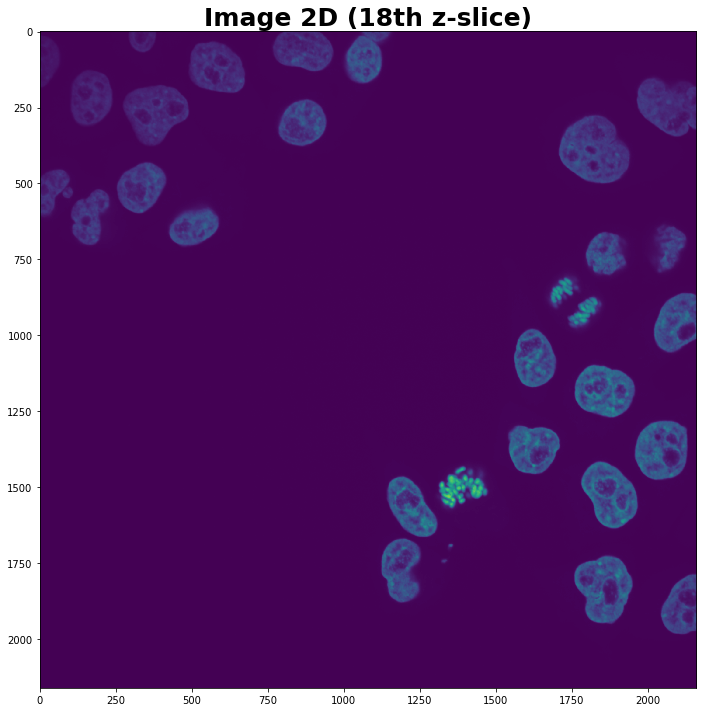

In [5]:
path_output = os.path.join(output_directory, "image_2D")
plot.plot_yx(image, r=0, c=0, z=17, 
             title="Image 2D (18th z-slice)", 
             framesize=(10, 10), remove_frame=False, 
             path_output=path_output, ext="png")

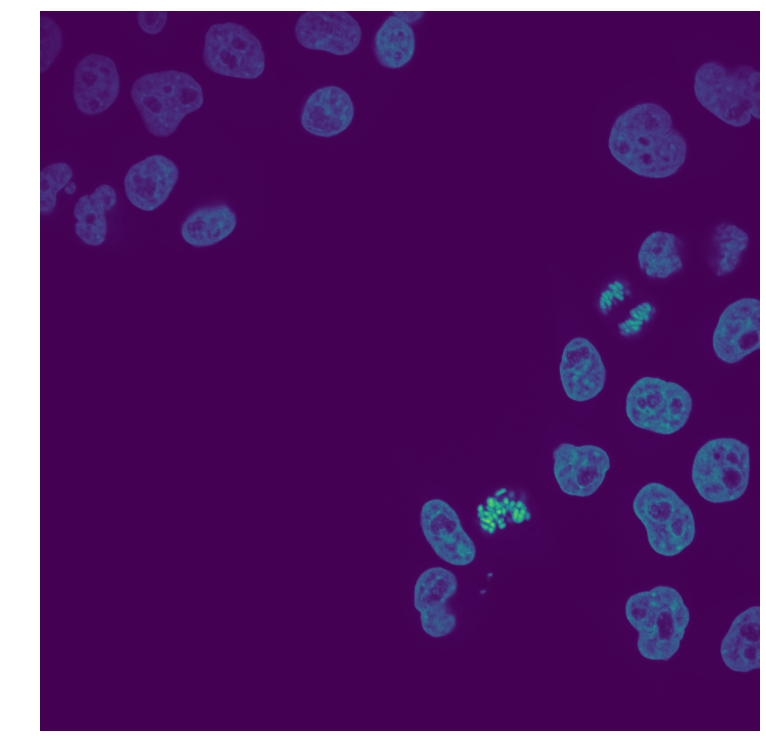

In [6]:
path_output = os.path.join(output_directory, "image_2D_no_frame")
plot.plot_yx(image, r=0, c=0, z=17, 
             title="Image 2D (18th z-slice)", 
             framesize=(10, 10), remove_frame=True, 
             path_output=path_output, ext="png")

### Plot several 2D images

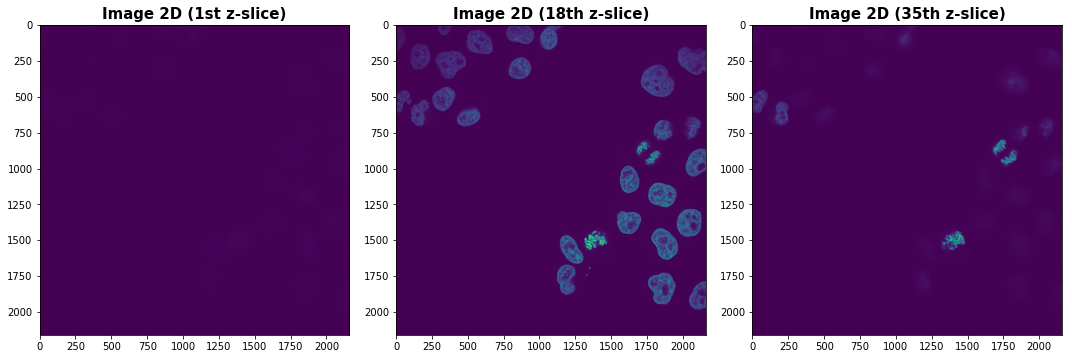

In [4]:
images = [image[0, 0, 0, :, :], image[0, 0, 17, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (1st z-slice)", "Image 2D (18th z-slice)", "Image 2D (35th z-slice)"]
path_output = os.path.join(output_directory, "3x_images_2D")
plot.plot_images(images, 
                 titles=titles, 
                 framesize=(15, 5), remove_frame=False,
                 path_output=path_output, ext="png")

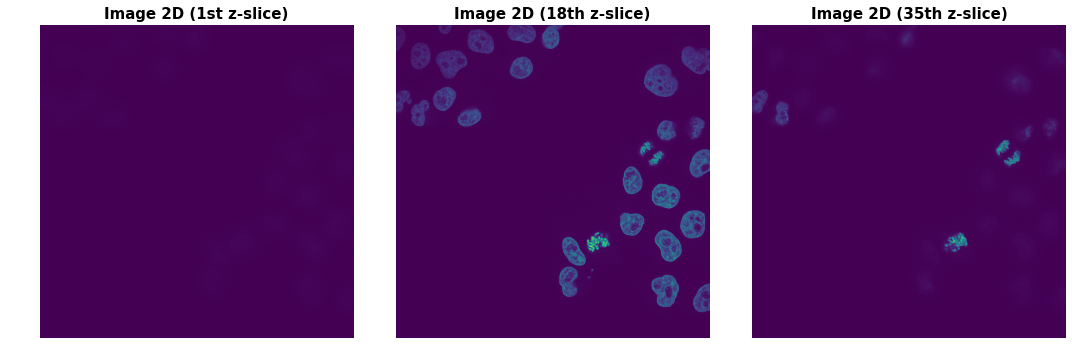

In [5]:
images = [image[0, 0, 0, :, :], image[0, 0, 17, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (1st z-slice)", "Image 2D (18th z-slice)", "Image 2D (35th z-slice)"]
path_output = os.path.join(output_directory, "3x_images_2D_no_frame")
plot.plot_images(images, 
                 titles=titles, 
                 framesize=(15, 5), remove_frame=True,
                 path_output=path_output, ext="png")

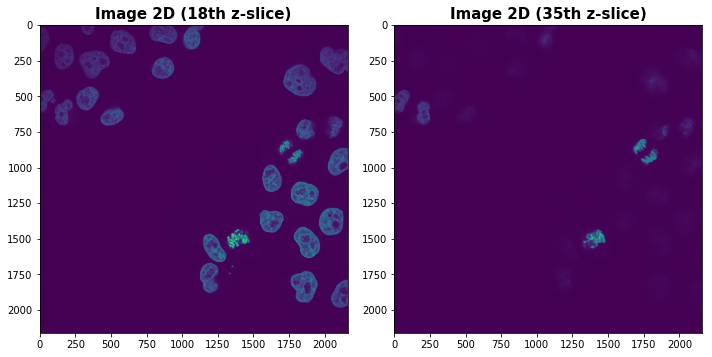

In [7]:
images = [image[0, 0, 17, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (18th z-slice)", "Image 2D (35th z-slice)"]
plot.plot_images(images, titles=titles, framesize=(10, 5))

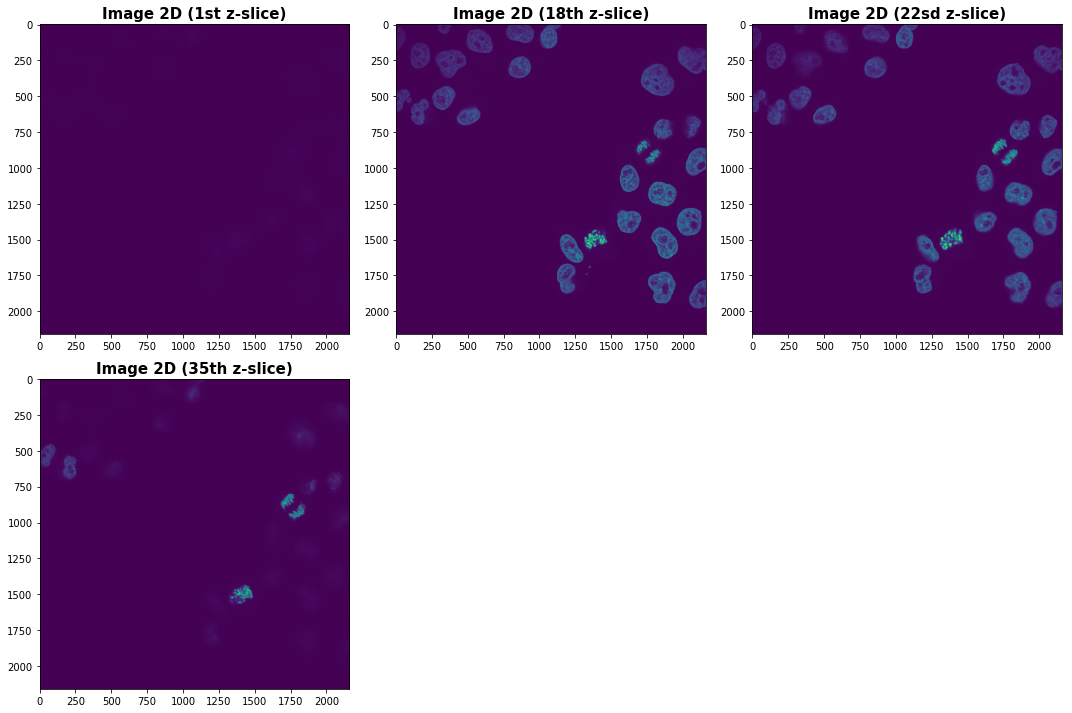

In [10]:
images = [image[0, 0, 0, :, :], image[0, 0, 17, :, :],
          image[0, 0, 22, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (1st z-slice)", "Image 2D (18th z-slice)",
          "Image 2D (22sd z-slice)", "Image 2D (35th z-slice)"]
plot.plot_images(images, titles=titles, framesize=(15, 10))

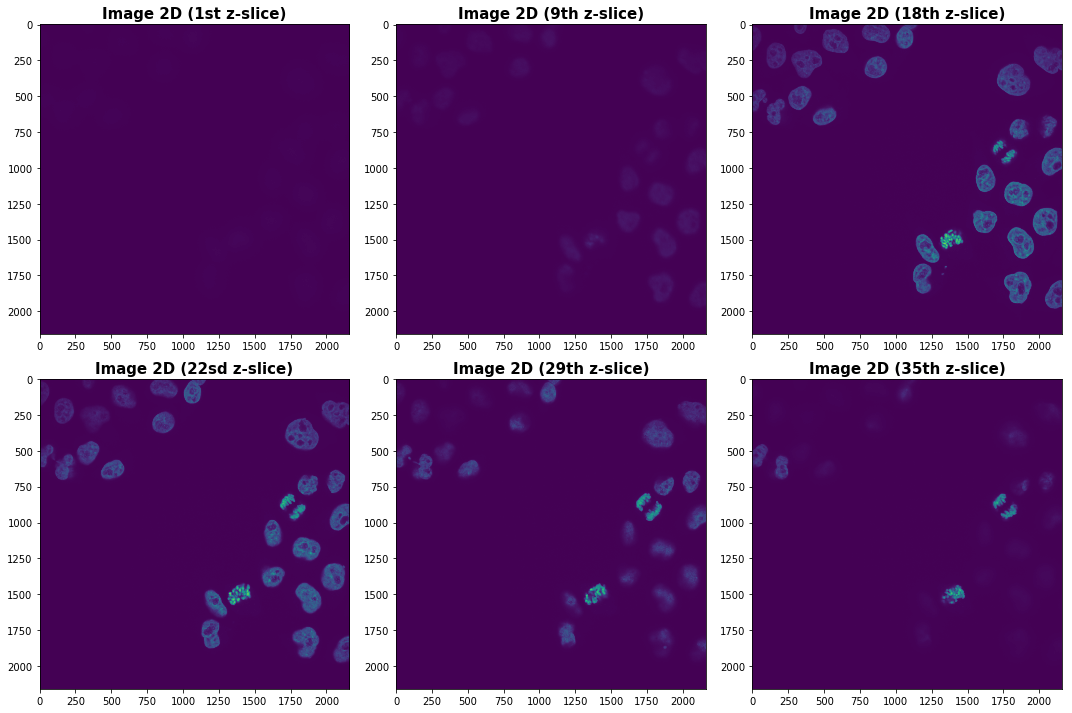

In [11]:
images = [image[0, 0, 0, :, :], image[0, 0, 8, :, :], image[0, 0, 17, :, :],
          image[0, 0, 22, :, :], image[0, 0, 28, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (1st z-slice)", "Image 2D (9th z-slice)", "Image 2D (18th z-slice)",
          "Image 2D (22sd z-slice)", "Image 2D (29th z-slice)", "Image 2D (35th z-slice)"]
plot.plot_images(images, titles=titles, framesize=(15, 10))

### Plot 2D slices of every channels

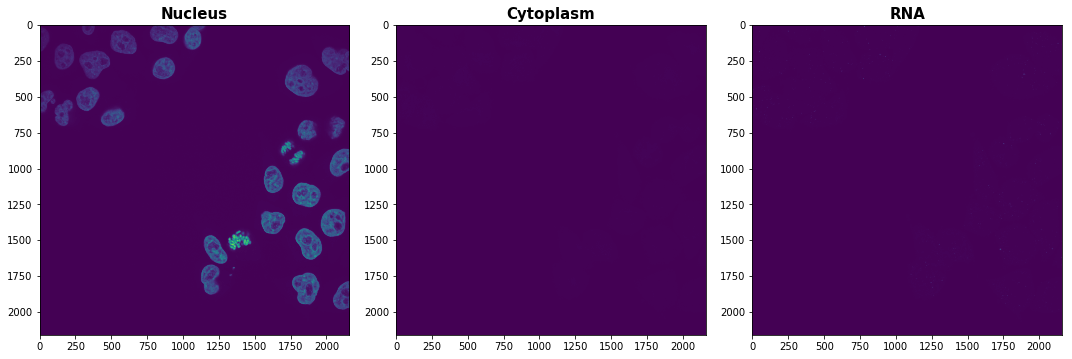

In [9]:
titles = ["Nucleus", "Cytoplasm", "RNA"]
path_output = os.path.join(output_directory, "image_channels_2D")
plot.plot_channels_2d(image, r=0, z=17, 
                      titles=titles, 
                      framesize=(15, 5), remove_frame=False, 
                      path_output=path_output, ext="png")

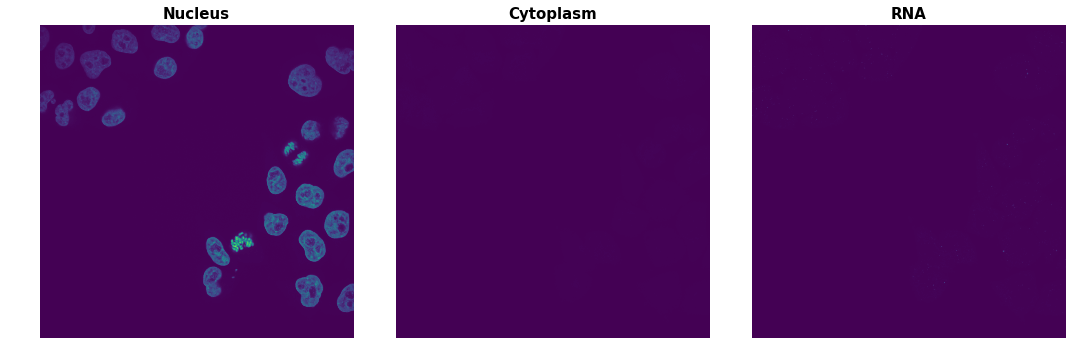

In [18]:
titles = ["Nucleus", "Cytoplasm", "RNA"]
path_output = os.path.join(output_directory, "image_channels_2D_no_frame")
plot.plot_channels_2d(image, r=0, z=17, 
                      titles=titles, 
                      framesize=(15, 5), remove_frame=True, 
                      path_output=path_output, ext="png")